<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [146]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [147]:
# loading the data: Wholesale customers data
# Import the CSV file
customer_data = pd.read_csv('Wholesale customers data.csv')

# Display the first few rows of the dataset
print(customer_data.head())

# Display basic information about the dataset
print(customer_data.info())


 

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

Column names:
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

Categorical columns:
0
Missing values in each column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Descriptive statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250

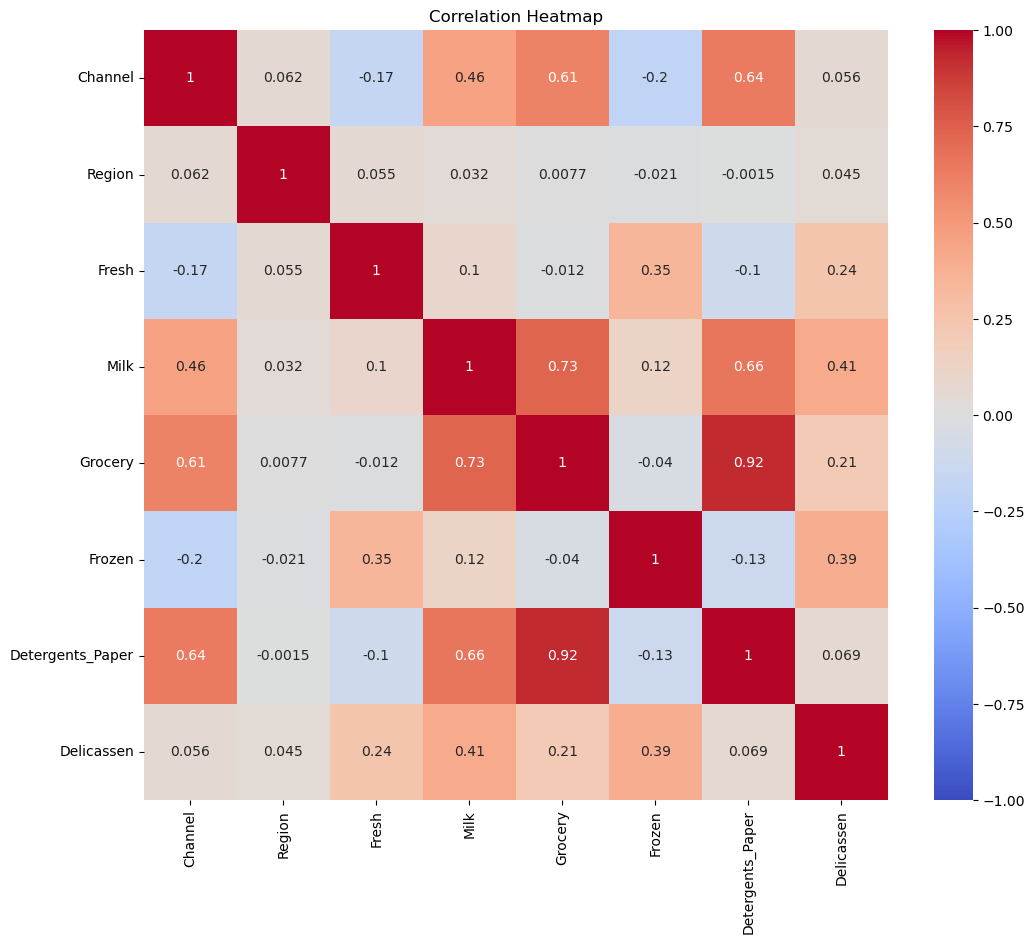

Highly correlated columns (correlation > 0.8):
Grocery and Detergents_Paper: 0.92


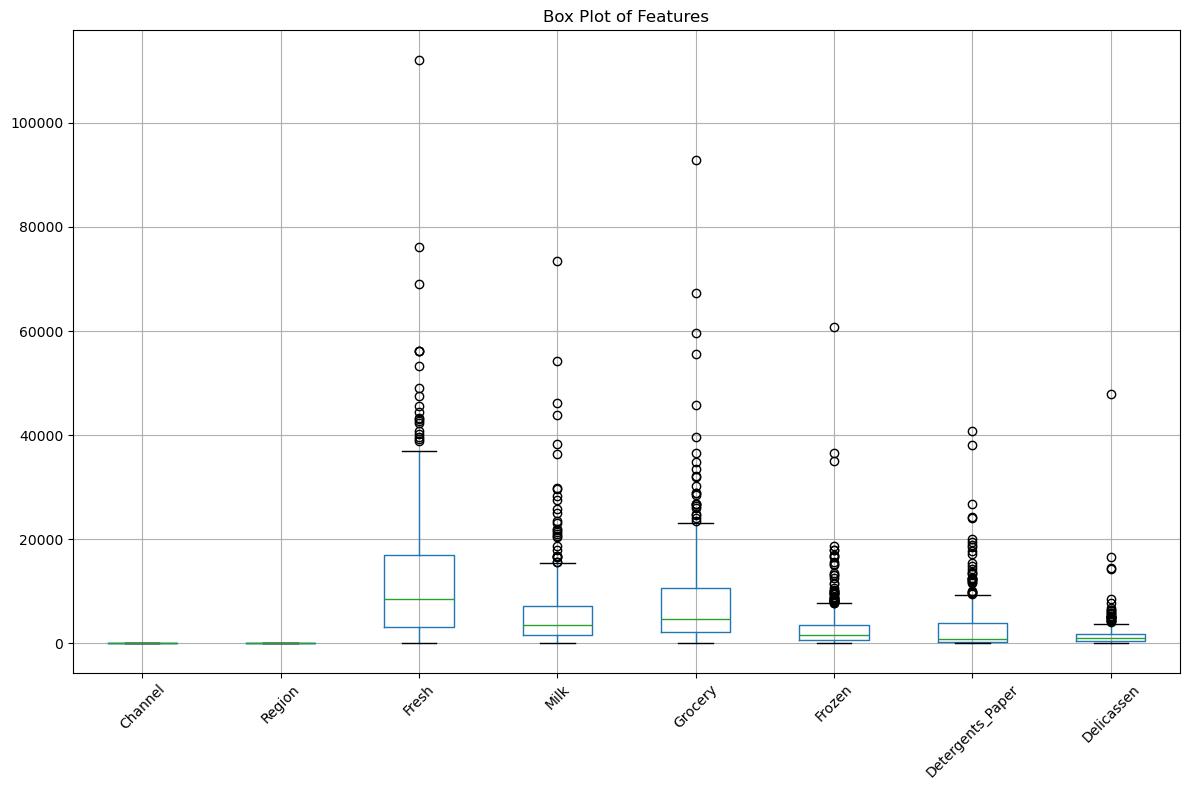

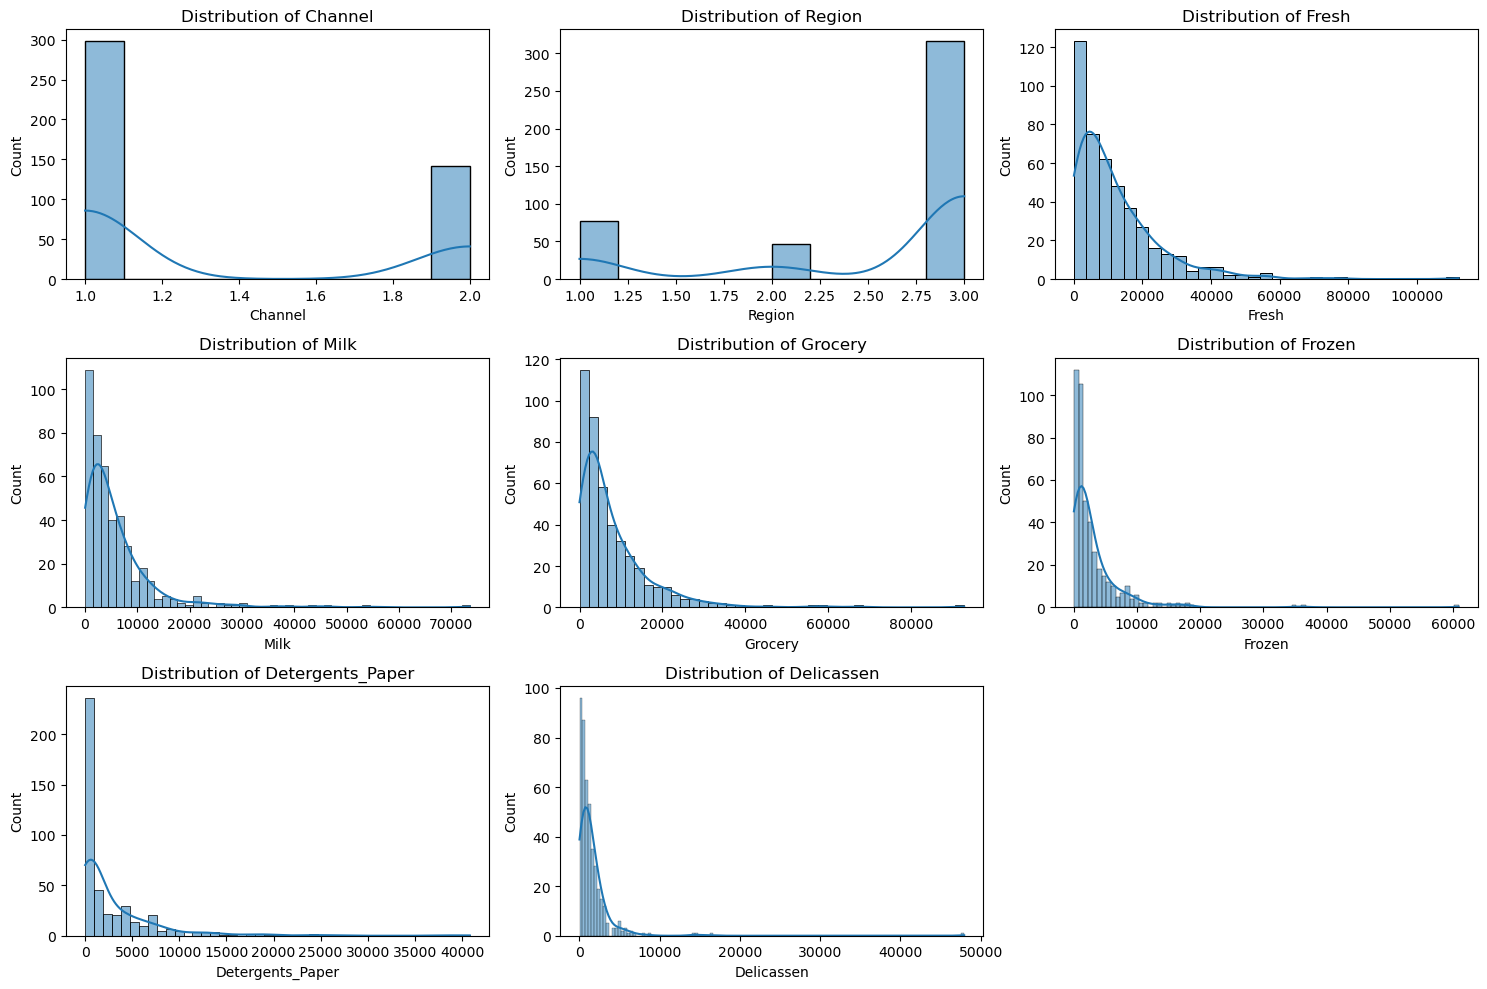

In [148]:
# Your code here:

# Examine column names and meanings
print("Column names:")
print(customer_data.columns)

# Check for categorical data
categorical_columns = customer_data.select_dtypes(include=['object']).columns

print("\nCategorical columns:")
print(len(categorical_columns))
 

# Check for missing data
print("Missing values in each column:")
print(customer_data.isnull().sum())

# Descriptive statistics
print("\nDescriptive statistics:")
print(customer_data.describe())

 # Display correlation matrix
correlation_matrix = customer_data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

# Identify highly correlated columns (correlation > 0.9)
high_corr = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_list = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr) if x != y and x < y]

print("Highly correlated columns (correlation > 0.8):")
for pair in high_corr_list:
    print(f"{pair[0]} and {pair[1]}: {correlation_matrix.loc[pair[0], pair[1]]:.2f}")

 
# Check for outliers using box plots
plt.figure(figsize=(12, 8))
customer_data.boxplot()
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check distribution of each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(customer_data.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(customer_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()







**Your observations here**

- Groceries and Detergents Paper have a high correlation (92%). 
- There are features with outliers that can be potnetially removed. 


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.


Categorical columns:
0
Missing values in each column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


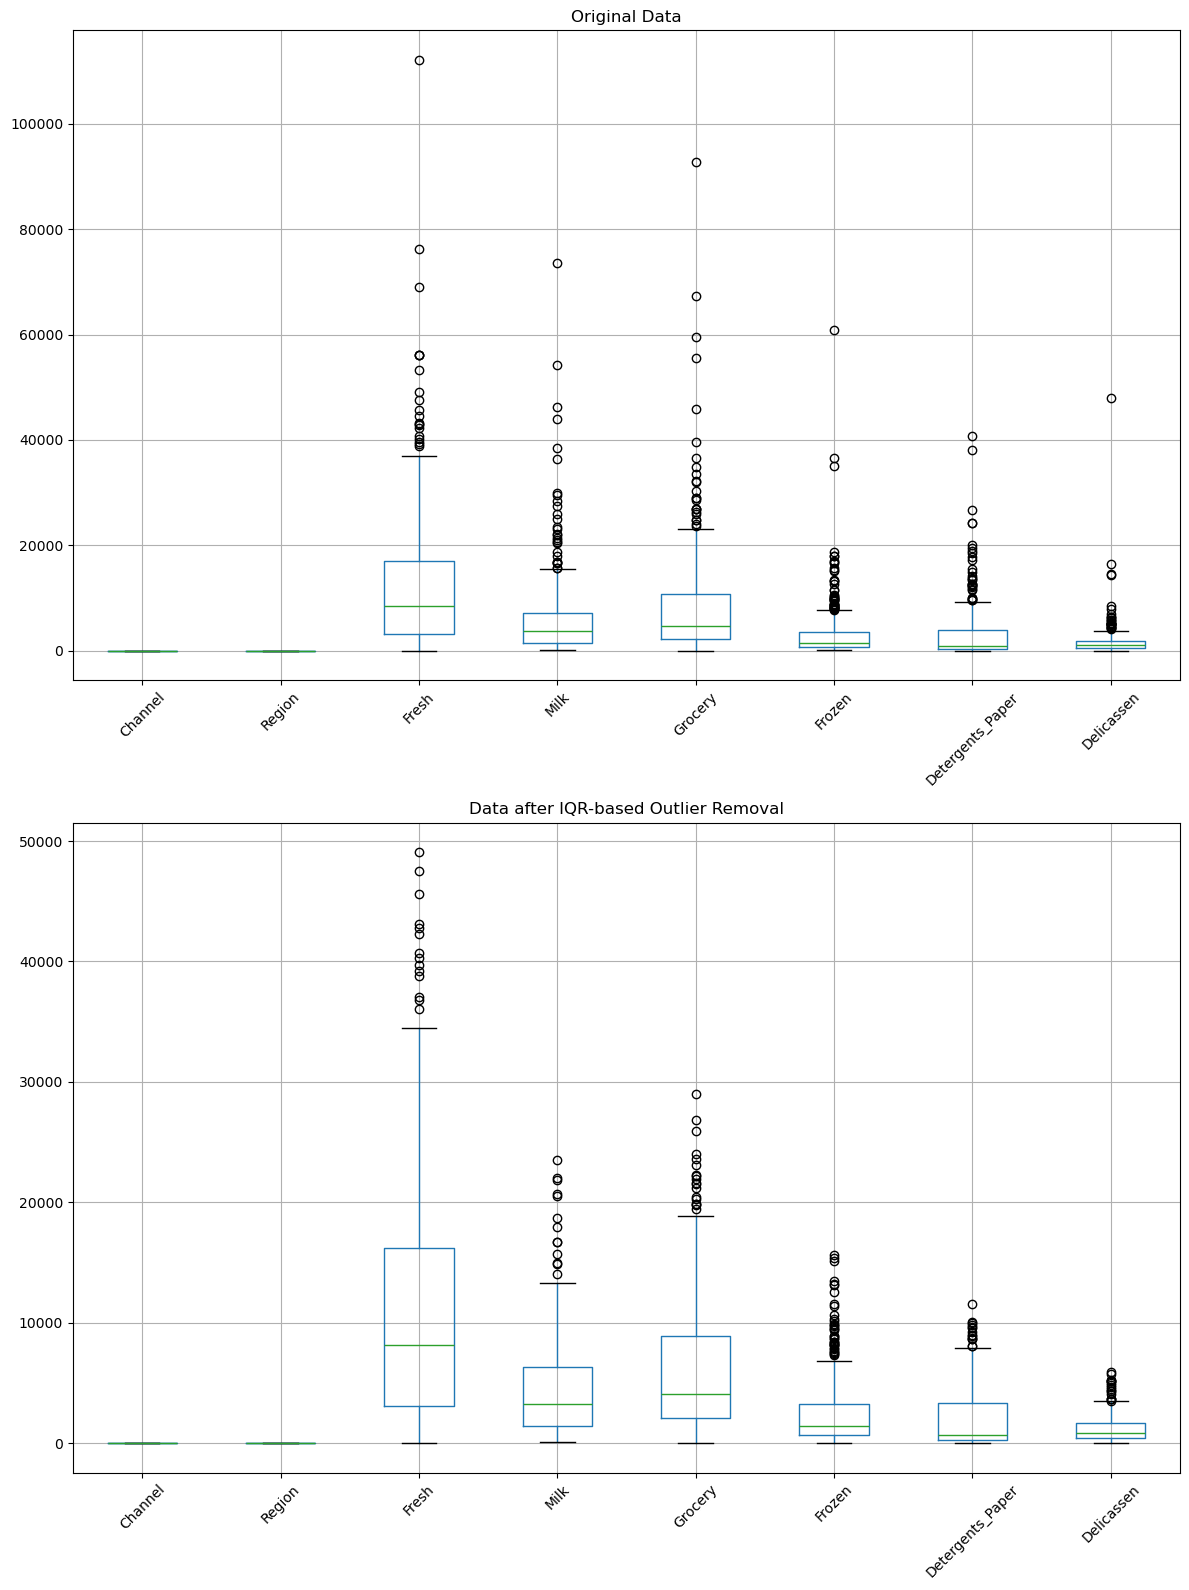

In [149]:
# Your code here
from sklearn.preprocessing import StandardScaler

# Based on the previous analysis, we don't need to perform extensive data cleaning or transformation.
# The data appears to be already in a suitable format for clustering analysis. For example:
# Check for categorical data
categorical_columns = customer_data.select_dtypes(include=['object']).columns

print("\nCategorical columns:")
print(len(categorical_columns))
 

# Check for missing data
print("Missing values in each column:")
print(customer_data.isnull().sum())


# The data is already numerical and doesn't require encoding.
 
# Rationale for minimal cleaning:
# 1. The data is already numerical, so no encoding is needed. 
# 2. The main issue of different scales will be addressed in the next challenge using StandardScaler.

# Lastly removing outliers

def remove_outliers(customer_data, columns, z_threshold=3):
    for column in columns:
        z_scores = np.abs((customer_data[column] - customer_data[column].mean()) / customer_data[column].std())
        customer_data = customer_data[z_scores < z_threshold]
    return customer_data


# Usage
numeric_columns = customer_data.select_dtypes(include=[np.number]).columns
customer_data_clean = remove_outliers(customer_data, numeric_columns)

# Checking again for outliers using box plots


# Plot to compare
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))
customer_data.boxplot(ax=ax1)
ax1.set_title('Original Data')
ax1.tick_params(axis='x', rotation=45)

customer_data_clean.boxplot(ax=ax2)
ax2.set_title('Data after IQR-based Outlier Removal')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Your comment here**

- Based on the previous analysis, we don't need to perform extensive data cleaning or transformation.
- The data appears to be already in a suitable format for clustering analysis. 
- The data is already numerical, so no encoding is needed. 
- The main issue of different scales will be addressed in the next challenge using StandardScaler.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [150]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

data = customer_data_clean
scaler = StandardScaler()

# Fit the scaler to the data and transform it
customers_scale = scaler.fit_transform(data)

 


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   
5        2       3   9413  8259     5126     666              1795   

   Delicassen  Cluster  
0        1338        2  
1        1776        2  
3        1788        0  
4        5185        2  
5        1451        2  
Cluster
0    207
2    109
1     80
Name: count, dtype: int64


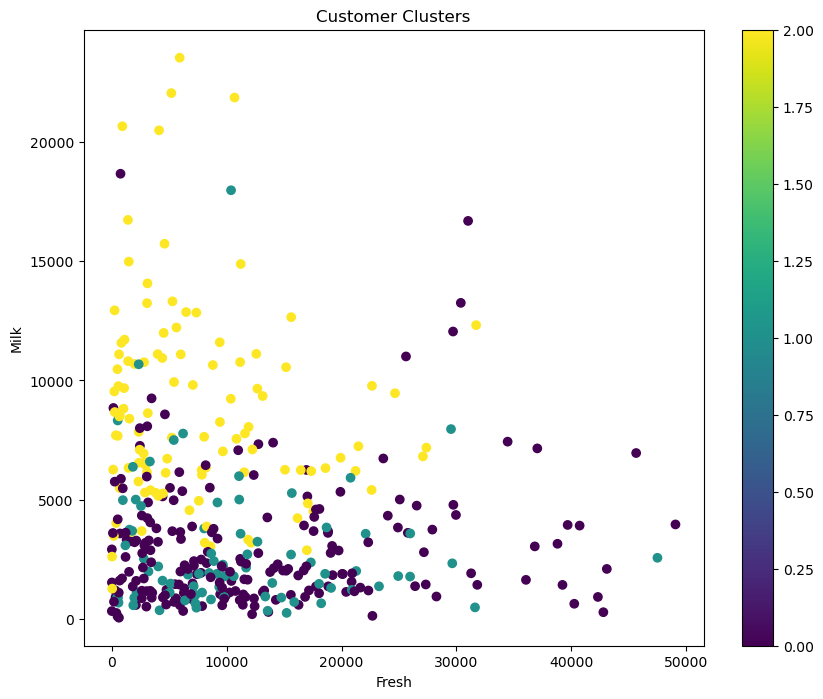

In [151]:
# Your code here:
from sklearn.cluster import KMeans

# Initialise the K-Means model

kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to the scaled data
kmeans.fit(customers_scale)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the labels to the original customer_data DataFrame
customer_data_clean['Cluster'] = cluster_labels

# Print the cluster assignments alongside the original data
print(customer_data_clean.head())

# See how many customers are in each cluster
print(customer_data_clean['Cluster'].value_counts())

# Visualise the clusters with 'Fresh' and 'Milk'
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
scatter = plt.scatter(customer_data_clean['Fresh'], customer_data_clean['Milk'], c=customer_data_clean['Cluster'], cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Customer Clusters')
plt.colorbar(scatter)
plt.show()

### Looking to the elbow we can choose 2 like the correct number of clusters

In [152]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [153]:
customer_data_clean['Label'] = clusters

Count the values in `labels`.

In [154]:
# Your code here:
print(customer_data_clean['Label'].value_counts())



Label
0    285
1    111
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

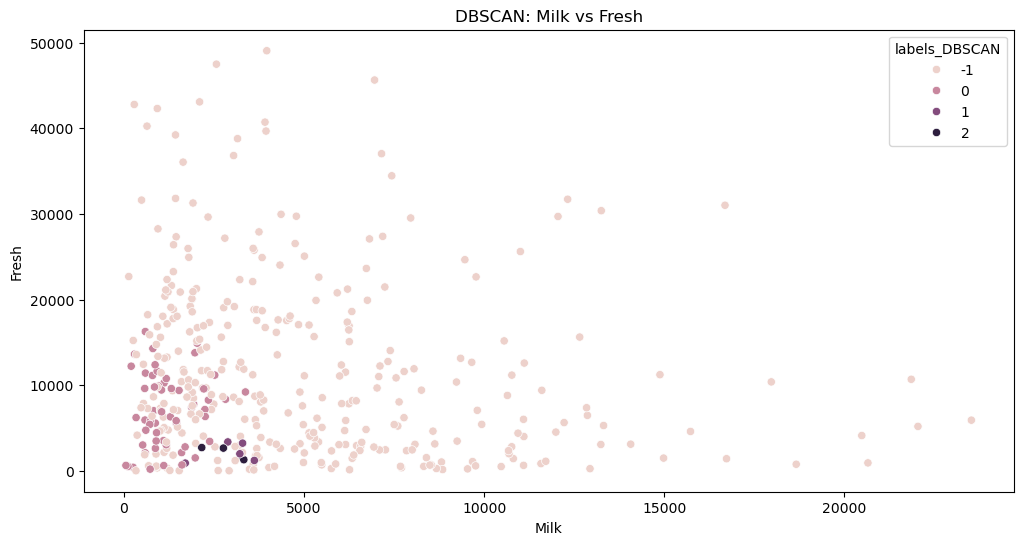

In [155]:
from sklearn.cluster import DBSCAN 

# Your code here
# Initialize DBSCAN model
dbscan = DBSCAN(eps=0.5)

# Fit the model to the scaled data
dbscan_fit = dbscan.fit(customers_scale)

# Assign the labels from DBSCAN to the original dataframe
customer_data_clean['labels_DBSCAN'] = dbscan_fit.labels_

# Visualise`Milk` and 'Fresh' by `labels_DBSCAN`
plt.figure(figsize=(12, 6))

sns.scatterplot(x=customer_data_clean['Milk'], 
                y=customer_data_clean['Fresh'],
                hue=customer_data_clean['labels_DBSCAN'])
plt.title('DBSCAN: Milk vs Fresh') 

plt.show()





Count the values in `labels_DBSCAN`.

In [156]:
# Your code here
print(customer_data_clean['labels_DBSCAN'].value_counts())

labels_DBSCAN
-1    332
 0     55
 1      5
 2      4
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [157]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title('Detergents Paper vs Milk ')
    return plt.show();

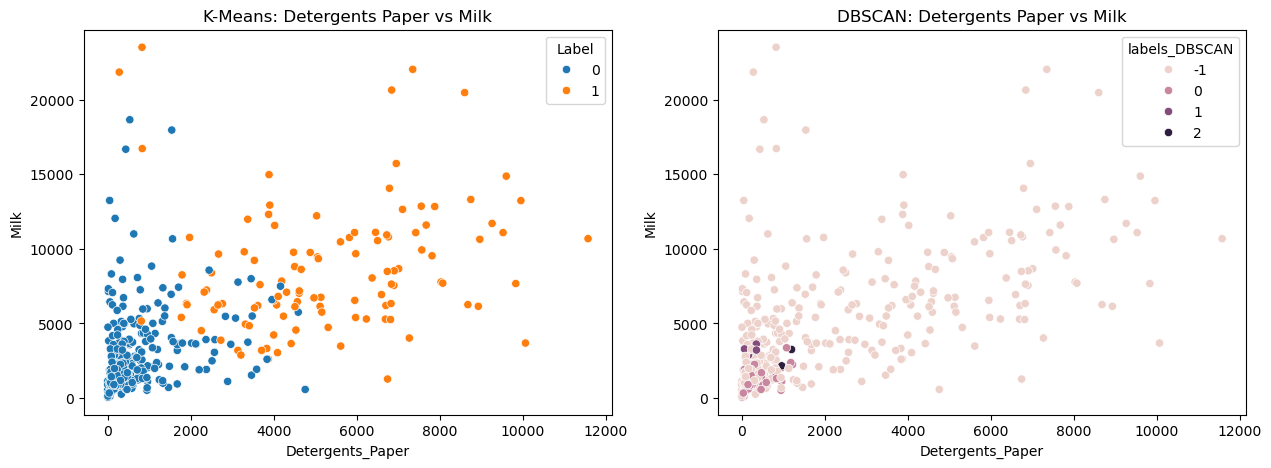

In [158]:
# Your code here:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x='Detergents_Paper', y='Milk', hue='Label', data=customer_data_clean, ax=axes[0])
axes[0].set_title('K-Means: Detergents Paper vs Milk')

sns.scatterplot(x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', data=customer_data_clean, ax=axes[1])
axes[1].set_title('DBSCAN: Detergents Paper vs Milk')

plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

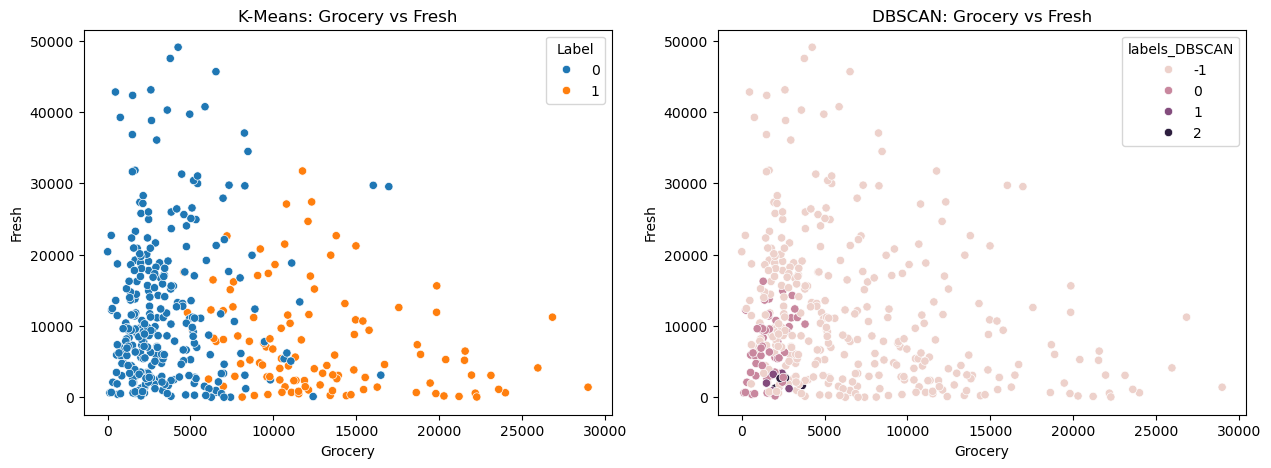

In [159]:
# Your code here:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x='Grocery', y='Fresh', hue='Label', data=customer_data_clean, ax=axes[0])
axes[0].set_title('K-Means: Grocery vs Fresh')

sns.scatterplot(x='Grocery', y='Fresh', hue='labels_DBSCAN', data=customer_data_clean, ax=axes[1])
axes[1].set_title('DBSCAN: Grocery vs Fresh')

plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

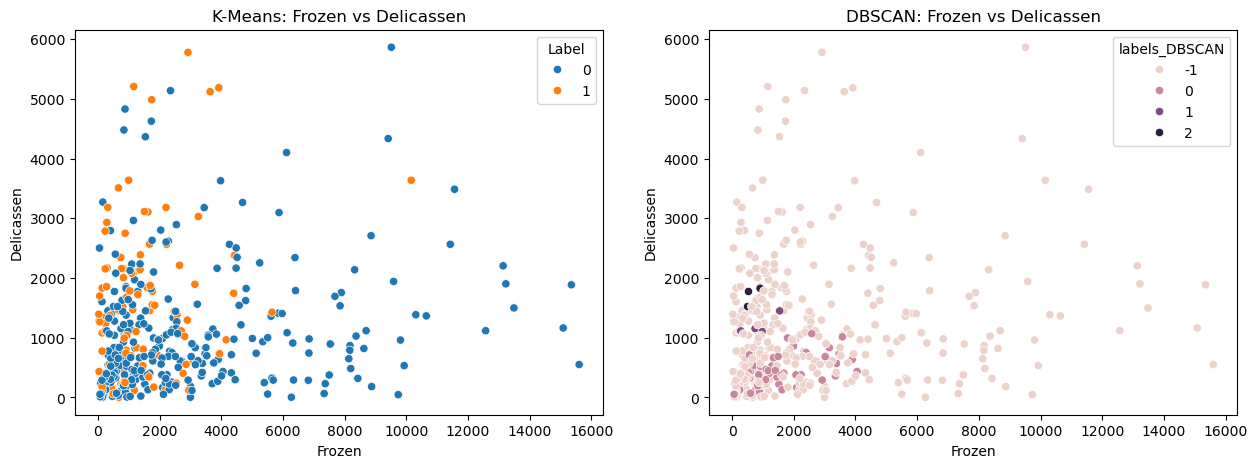

In [160]:
# Your code here:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x='Frozen', y='Delicassen', hue='Label', data=customer_data_clean, ax=axes[0])
axes[0].set_title('K-Means: Frozen vs Delicassen')

sns.scatterplot(x='Frozen', y='Delicassen', hue='labels_DBSCAN', data=customer_data_clean, ax=axes[1])
axes[1].set_title('DBSCAN: Frozen vs Delicassen')

plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [161]:
# Your code here:

# Group by 'Label' and compute the mean for all columns
mean_by_label = customer_data_clean.groupby('Label').mean()
print("Mean values by K-Means labels:")
print(mean_by_label)

# Group by 'labels_DBSCAN' and compute the mean for all columns
mean_by_labels_DBSCAN = customer_data_clean.groupby('labels_DBSCAN').mean()
print("\nMean values by DBSCAN labels:")
print(mean_by_labels_DBSCAN)


Mean values by K-Means labels:
        Channel    Region         Fresh         Milk       Grocery  \
Label                                                                
0      1.031579  2.512281  12126.824561  2923.052632   3514.922807   
1      1.945946  2.666667   7634.630631  8654.621622  13016.405405   

            Frozen  Detergents_Paper   Delicassen   Cluster  labels_DBSCAN  
Label                                                                       
0      2998.333333        703.761404  1056.585965  0.273684      -0.729825  
1      1411.360360       5305.909910  1484.072072  1.981982      -1.000000  

Mean values by DBSCAN labels:
                Channel   Region         Fresh         Milk      Grocery  \
labels_DBSCAN                                                              
-1             1.343373  2.46988  11743.515060  5122.813253  7026.114458   
 0             1.000000  3.00000   7014.272727  1213.309091  1686.327273   
 1             1.000000  3.00000   2134.60000

Which algorithm appears to perform better?

In [162]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores
kmeans_silhouette = silhouette_score(customers_scale, customer_data_clean['Label'])
dbscan_silhouette = silhouette_score(customers_scale, customer_data_clean['labels_DBSCAN'])

print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")

K-Means Silhouette Score: 0.35880337067600454
DBSCAN Silhouette Score: -0.15223889850251604


**Your observations here**

- Based on the silhouette scores, K-Means performs better than DBSCAN for this dataset. The positive silhouette score for K-Means indicates that the clusters are reasonably well-defined, whereas the negative silhouette score for DBSCAN suggests poor clustering performance.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

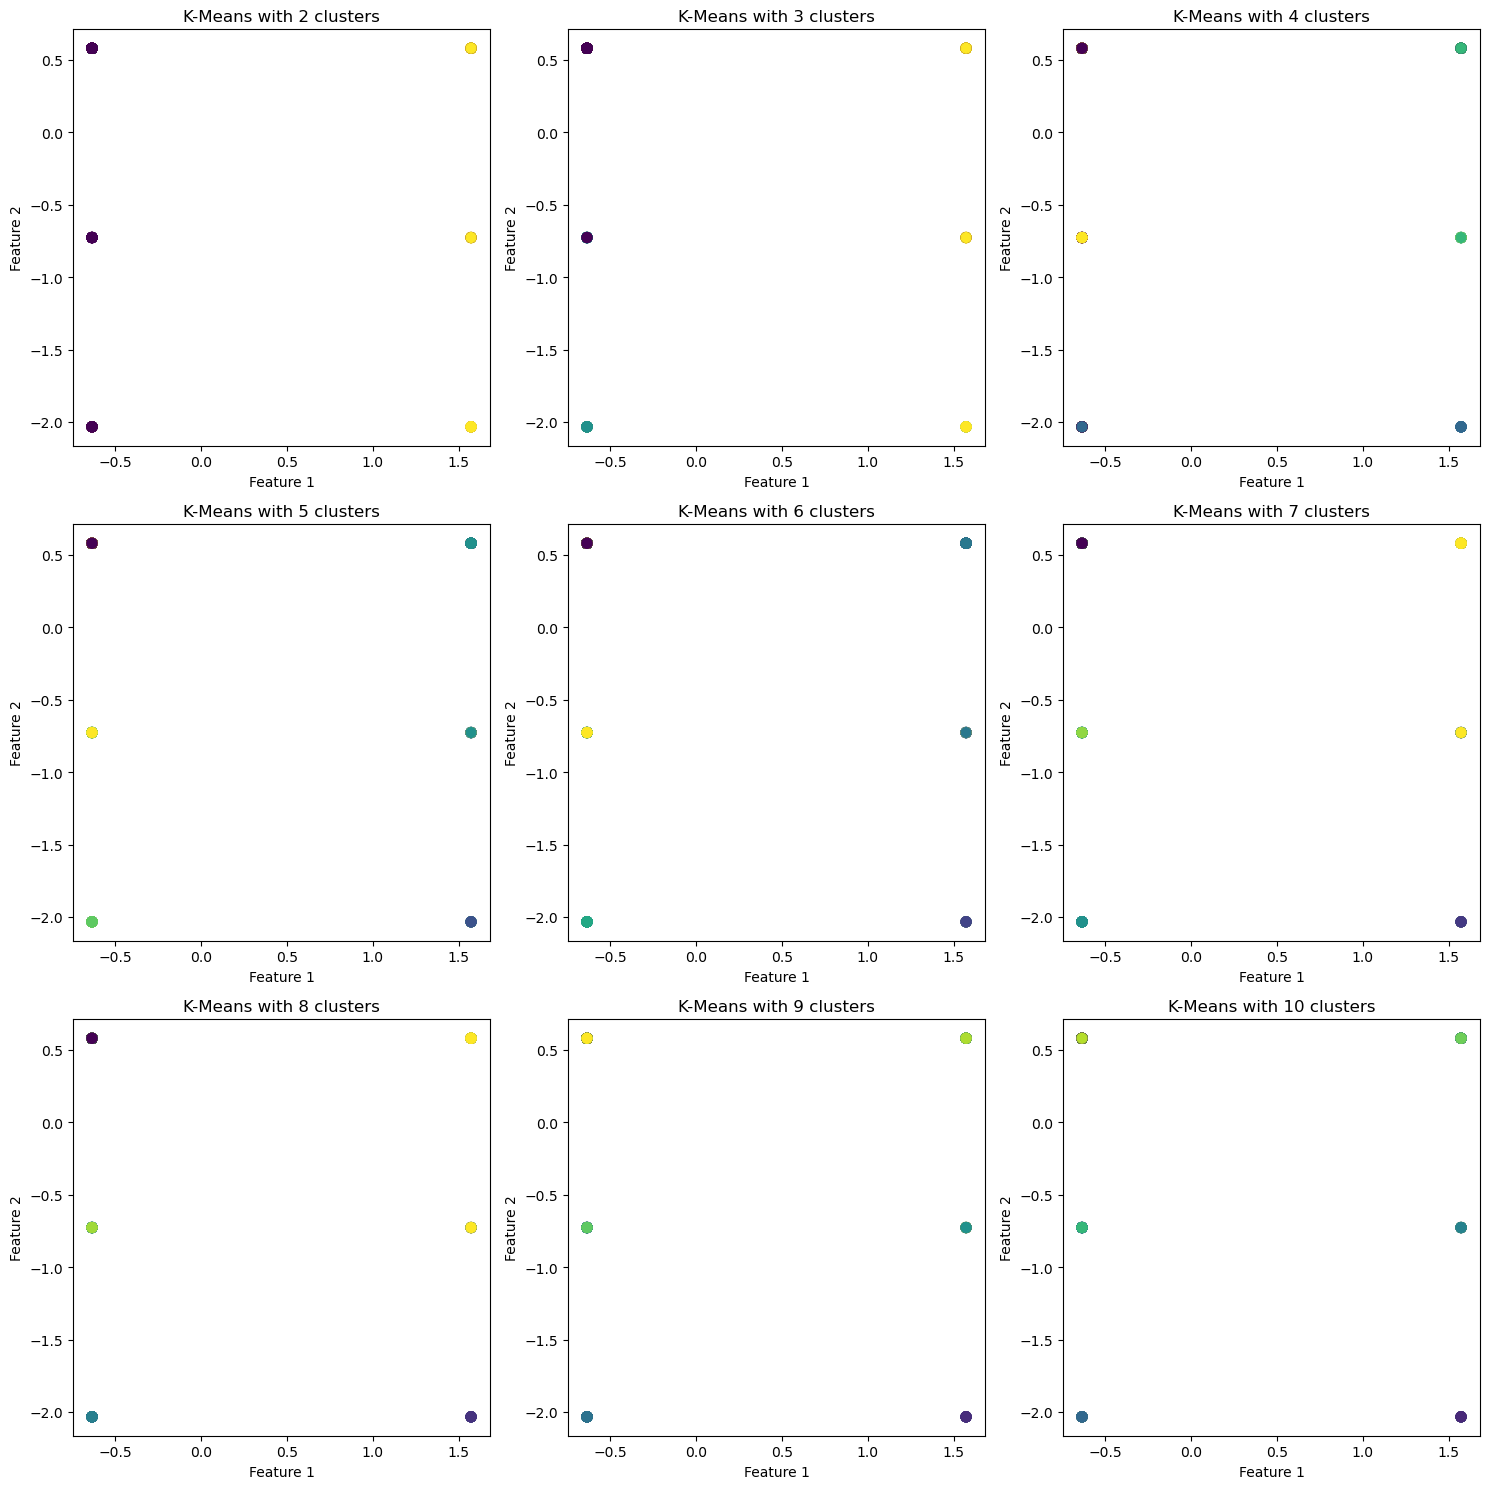

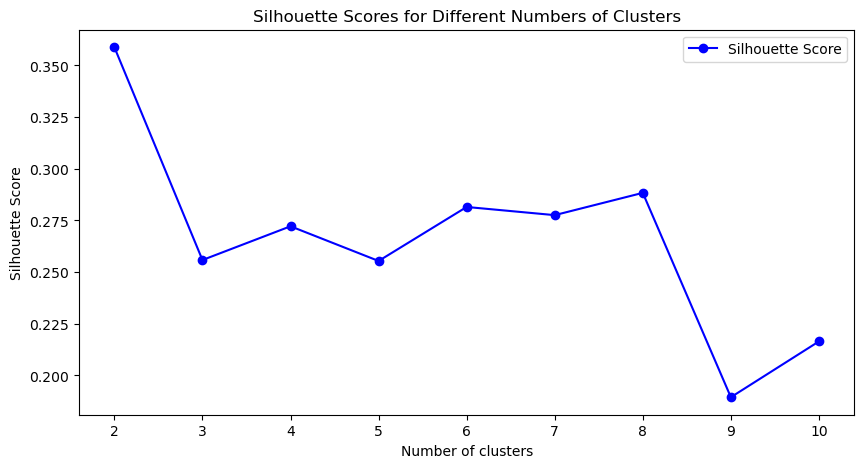

In [163]:
# Your code here:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define a range for the number of clusters
cluster_range = range(2, 11)

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, n_clusters in enumerate(cluster_range):
    # Apply K-Means with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(customers_scale)
    
    # Plot the results
    axes[i].scatter(customers_scale[:, 0], customers_scale[:, 1], c=labels, cmap='viridis', s=50)
    axes[i].set_title(f'K-Means with {n_clusters} clusters')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

# Adjust layout
plt.tight_layout()
plt.show()

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow Method
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_scale)
    silhouette_scores.append(silhouette_score(customers_scale, kmeans.labels_))


# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K, silhouette_scores, 'bo-', label='Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.legend()
plt.show()


**Your comment here**

- Based on the silhouette scores solely, K-Means with 2 clusters has a higher silhouette score compared to higher number of clusters, suggesting that 2 clusters might be a better choice. 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

DBSCAN (eps=0.3, min_samples=5) unique labels: [-1  0]
DBSCAN (eps=0.3, min_samples=10) unique labels: [-1]
DBSCAN (eps=0.3, min_samples=15) unique labels: [-1]
DBSCAN (eps=0.5, min_samples=5) unique labels: [-1  0  1  2]
DBSCAN (eps=0.5, min_samples=10) unique labels: [-1  0]
DBSCAN (eps=0.5, min_samples=15) unique labels: [-1  0]
DBSCAN (eps=0.7, min_samples=5) unique labels: [-1  0  1]
DBSCAN (eps=0.7, min_samples=10) unique labels: [-1  0]
DBSCAN (eps=0.7, min_samples=15) unique labels: [-1  0]


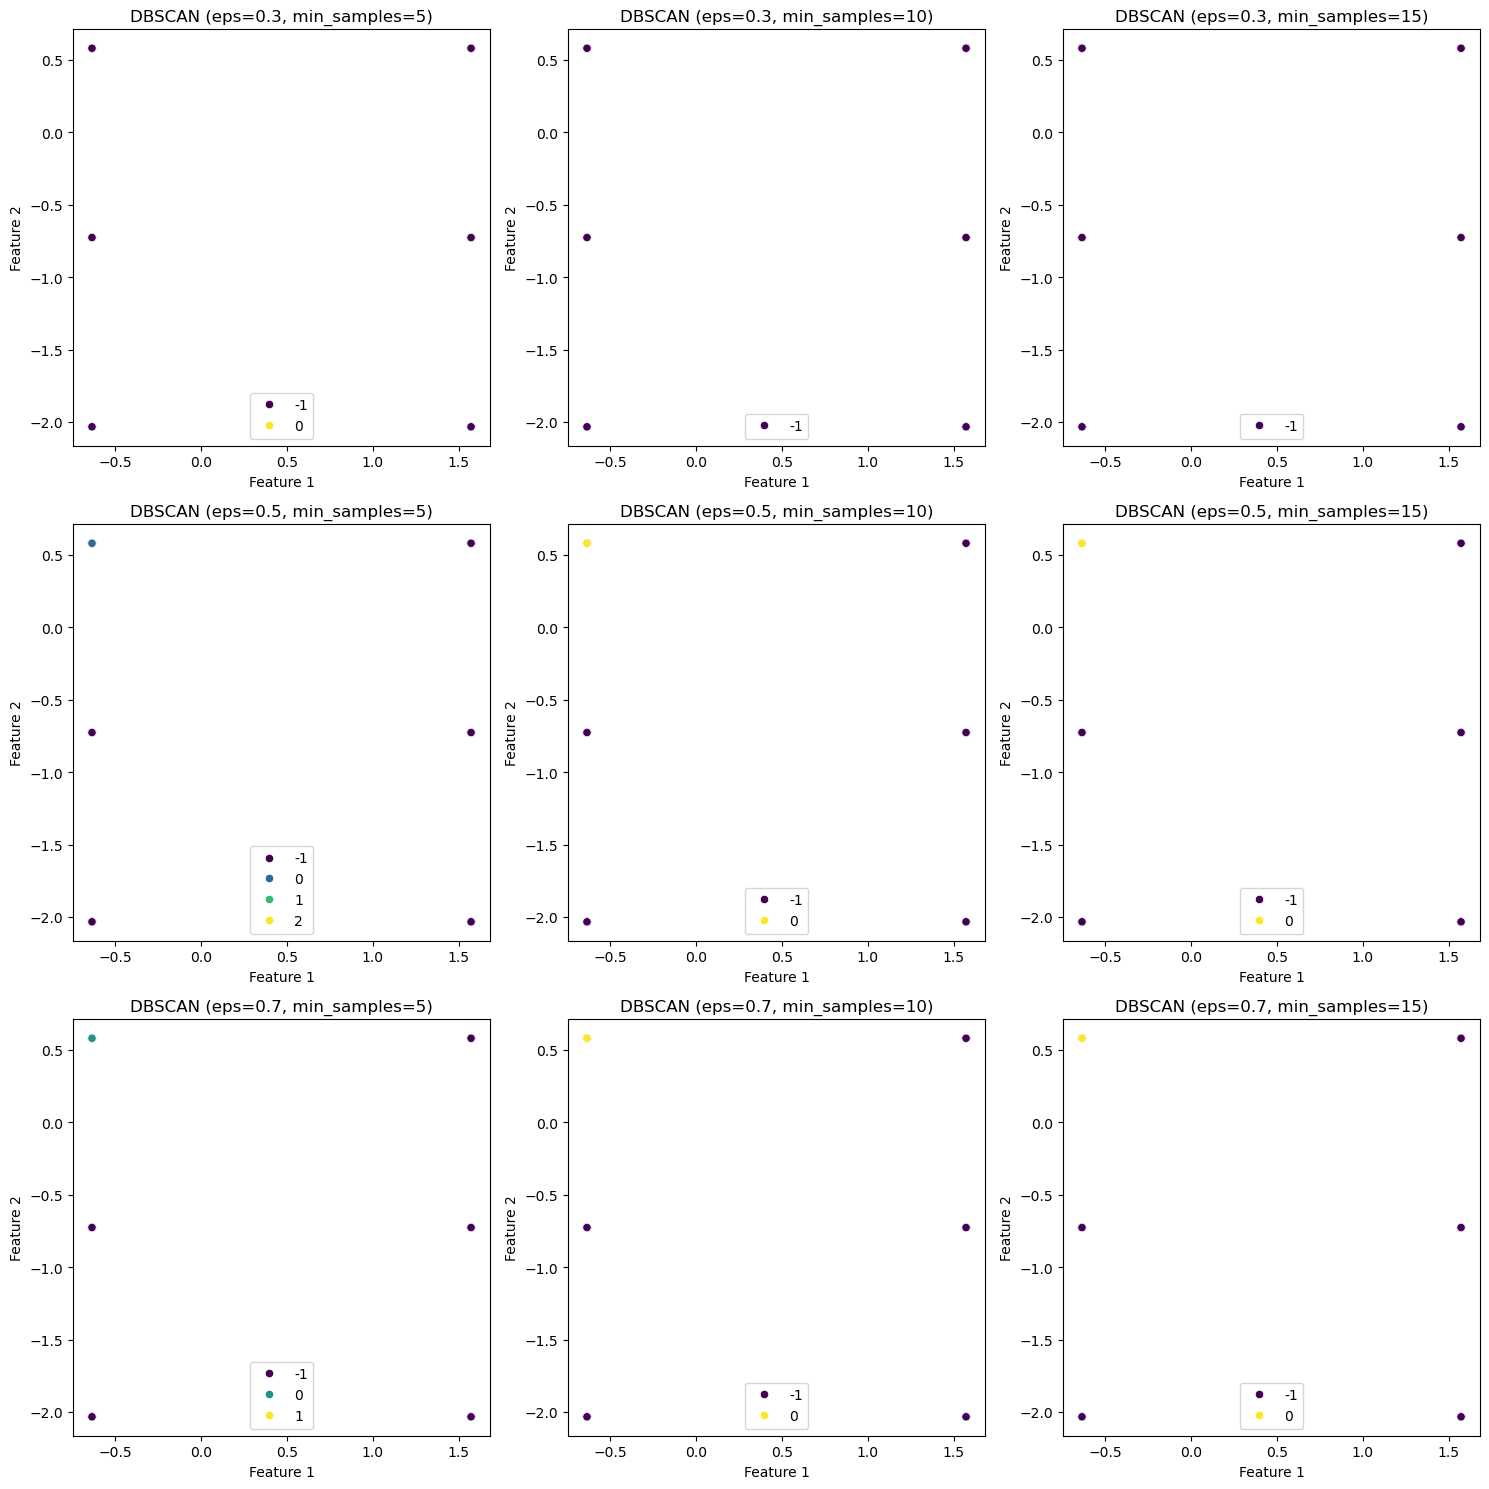

In [170]:
# Your code here
from sklearn.cluster import DBSCAN

# Define different values for eps and min_samples
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [5, 10, 15]

# create sub-plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(customers_scale)
        
        # Check unique labels
        unique_labels = np.unique(labels)
        print(f"DBSCAN (eps={eps}, min_samples={min_samples}) unique labels: {unique_labels}")
        
        # Plot the clusters
        sns.scatterplot(x=customers_scale[:, 0], y=customers_scale[:, 1], hue=labels, palette='viridis', ax=axes[i, j])
        axes[i, j].set_title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
        axes[i, j].set_xlabel('Feature 1')
        axes[i, j].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


**Your comment here**

- Based on the analysis, DBSCAN with eps=0.5 and min_samples=5 appears to be the optimal selection. This combination forms the most clusters (three clusters) while still identifying noise points, indicating a good balance between cluster formation and noise identification.